# Notes

## imports

In [14]:
import os
os.sys.path.insert(0, "/p/user_pub/xclim/persist/software/xsearch/")
import numpy as np
import xcdat as xc
import xsearch as xs

## define target vertical coord and set preset values

In [15]:
cpocean = 3992.0
rhozero = 1035.0
oceanVol = 1.33511e+18
newdepth = np.array([5,10,20,30,40,50,75,100,125,150,200,300,500,700,1000,1500,1800,2000]).astype('f');
newdepth.shape

(18,)

## search for E3SM-2-0 historical sims

In [18]:
dpaths = xs.findPaths('historical', 'thetao*', 'mon', realm='ocean', cmipTable='Omon')
#print(dpaths.keys())
xs.getValuesForFacet(dpaths, 'model', 'E3SM-2-0')  # also E3SM-1-0 (E3SM-Project (1-5), UCSB, E3SM-Project), E3SM-1-1 + ECA, E3SM-2-0-NARRM

Multiple values for variable. Consider filtering by variable.
Available values: thetao, thetaoga



['/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r1i1p1f1/Omon/thetao/gr/v20221114/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r2i1p1f1/Omon/thetao/gr/v20221116/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r3i1p1f1/Omon/thetao/gr/v20221118/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r4i1p1f1/Omon/thetao/gr/v20221120/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r5i1p1f1/Omon/thetao/gr/v20221121/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r6i1p1f1/Omon/thetao/gr/v20230805/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r7i1p1f1/Omon/thetao/gr/v20230811/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r8i1p1f1/Omon/thetaoga/gr/v20230818/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r9i1p1f1/Omon/thetao/gr/v20230827/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r10i1p1f1/Omon/thetaoga/gr/v2023080

## prototype for single realization - choose 14

In [19]:
ds = xc.open_mfdataset('/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r14i1p1f1/Omon/thetaoga/gr/v20230806/*')

In [20]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetaoga   (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  76650.0
    creation_date:          2023-08-06T00:43:23Z
    ...                     ...
    variable_id:            thetaoga
    variant_label:          r14i1p1f1
    version:                v20230806
    license:                CMIP6 model data produced by E3SM-Project is lice...
    cmor_version:           3.7.2
    references:             Golaz, J.-C., L. P. Van Roekel, X. Zheng and co-a...

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

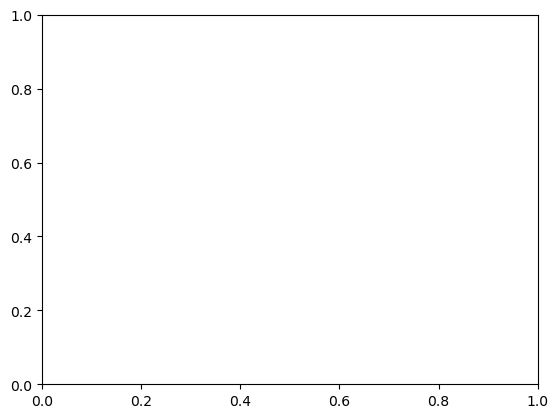

In [26]:
ds['thetaoga'].plot()